In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

# Querying the DB
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Unpacking the result
last_date = [last_date[0] for _ in last_date]

# Converting date to string
last_date = str(last_date[0])

print(f'The last measurement date is: {last_date}')

The last measurement date is: 2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Determining if there is a leap-year

# Converting last_date to datetime object
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')

year = last_date.year
month = last_date.month

# Depending on the month of the measure I need to determine if leap-year calculations are done on the current or previous year
if month < 3:
    year -=1

# Leap-year computing
leap = False
if last_date.year % 4 == 0 and \
(last_date.year % 100 != 0 or last_date.year % 400 == 0):
    leap = True

days = 365
if leap == True:
    days = 366

# Obtaining starting date
first_date = last_date - dt.timedelta(days=days)

print (f'The date range is from {first_date} to {last_date}')


The date range is from 2016-08-23 00:00:00 to 2017-08-23 00:00:00


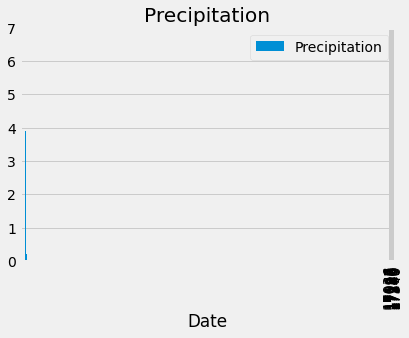

In [12]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, func.sum(Measurement.prcp))\
.group_by(Measurement.date)\
.filter(Measurement.date >= first_date)\
.filter(Measurement.date <= last_date)\

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(precipitation, columns = ['Date', 'Precipitation'])
prec_df.set_index('Date', inplace= True)
prec_df = prec_df.dropna()
# Sort the dataframe by date
prec_df = prec_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data

# Creating the ticks for the plot
x_ticks = []
for i in range(11):
    day = first_date.day
    month = first_date.month
    year = first_date.year
    month += i
    if month > 12:
        month -= 12
        year += 1
    xdate = f'{year}-{month}-{day}'
    x_ticks.append(dt.datetime.strptime(xdate, '%Y-%m-%d'))

    
prec_df.plot.bar(title = 'Precipitation',xticks = x_ticks,xlim = (first_date, last_date),ylim = (0, 7))
plt.xticks(rotation=90)
plt.show()

                             


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()